# Geophone Sensor Data

# Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# The Dataset:

In [2]:
df= pd.read_csv("/kaggle/input/geophone-sensor-dataset/geophone-sensor-data.csv")
df

,timestamp,mean,top_3_mean,min,max,std_dev,median,q1,q3,skewness,dominant_freq,energy,activity,name
0,01:51:43,2046.726000,2057.666667,2035,2060,3.452186,2047.0,2043.0,2049.0,-0.152574,601.0,1.988682e+09,walking,Yusuf
1,01:51:46,2046.619333,2053.000000,2040,2053,3.580469,2047.0,2044.0,2050.0,-0.150615,300.0,1.988028e+09,walking,Yusuf
2,01:51:50,2046.598000,2056.000000,2030,2059,3.592826,2047.0,2044.0,2049.0,-0.370125,300.0,1.987897e+09,walking,Yusuf
3,01:51:53,2046.560000,2054.000000,2039,2055,3.414830,2047.0,2044.0,2049.0,-0.321296,300.0,1.987662e+09,walking,Yusuf
4,01:51:56,2046.656667,2055.000000,2034,2057,3.356802,2048.0,2044.0,2049.0,-0.379134,300.0,1.988255e+09,walking,Yusuf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,21:17:01,2037.587333,2040.000000,2034,2040,1.564089,2038.0,2037.0,2039.0,-0.883816,600.0,1.932680e+09,waiting,Emir
1796,21:17:04,2037.606000,2041.333333,2033,2042,2.160578,2038.0,2036.0,2040.0,-0.199801,300.0,1.932797e+09,waiting,Emir
1797,21:17:07,2037.984000,2041.000000,2034,2041,1.686736,2038.0,2036.0,2039.0,-0.339960,300.0,1.935105e+09,waiting,Emir
1798,21:17:10,2037.482000,2041.000000,2033,2041,2.123286,2037.0,2036.0,2040.0,-0.176030,300.0,1.932039e+09,waiting,Emir


# Datasset in one look

In [3]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1800, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      1800 non-null   object 
 1   mean           1800 non-null   float64
 2   top_3_mean     1800 non-null   float64
 3   min            1800 non-null   int64  
 4   max            1800 non-null   int64  
 5   std_dev        1800 non-null   float64
 6   median         1800 non-null   float64
 7   q1             1800 non-null   float64
 8   q3             1800 non-null   float64
 9   skewness       1800 non-null   float64
 10  dominant_freq  1800 non-null   float64
 11  energy         1800 non-null   float64
 12  activity       1800 non-null   object 
 13  name           1800 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 197.0+ KB
None

Missing Values:
 timestamp        0
mean             0
top_3_mean       0
min 

In [4]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,mean,top_3_mean,min,max,std_dev,median,q1,q3,skewness,dominant_freq,energy
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1.800000e+03
mean,2042.246501,2064.689630,2016.367222,2067.155556,8.528827,2043.395556,2037.628333,2048.029722,-0.347341,410.099444,1.961492e+09
std,3.659114,28.293622,28.134259,31.800504,10.760641,5.044266,4.490098,9.018572,0.411987,152.875171,2.270491e+07
min,2034.810667,2039.000000,1948.000000,2039.000000,1.374898,2034.000000,2021.000000,2037.000000,-4.396233,1.000000,1.915725e+09
25%,2039.495333,2047.333333,2012.000000,2048.000000,2.710610,2040.000000,2035.000000,2042.000000,-0.671029,300.000000,1.944366e+09
50%,2041.287333,2052.333333,2031.000000,2053.000000,3.455542,2041.000000,2037.000000,2044.000000,-0.266822,300.000000,1.955328e+09
75%,2045.835667,2065.333333,2035.000000,2070.000000,4.707158,2048.000000,2040.000000,2050.000000,-0.058154,600.000000,1.984179e+09
max,2050.708667,2232.666667,2045.000000,2261.000000,37.678959,2056.000000,2049.000000,2069.000000,1.639461,601.000000,2.013153e+09


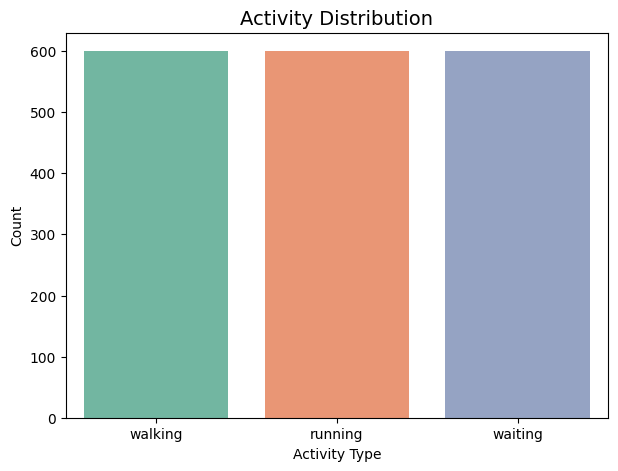

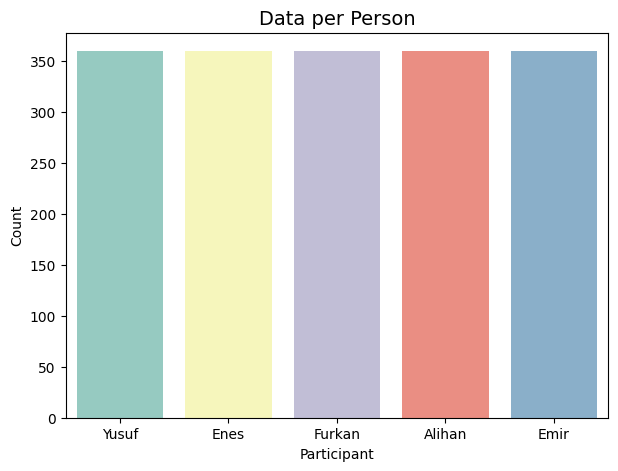

In [5]:
plt.figure(figsize=(7,5))
sns.countplot(x='activity', data=df, palette='Set2')
plt.title('Activity Distribution', fontsize=14)
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x='name', data=df, palette='Set3')
plt.title('Data per Person', fontsize=14)
plt.xlabel('Participant')
plt.ylabel('Count')
plt.show()

# Correlations:

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


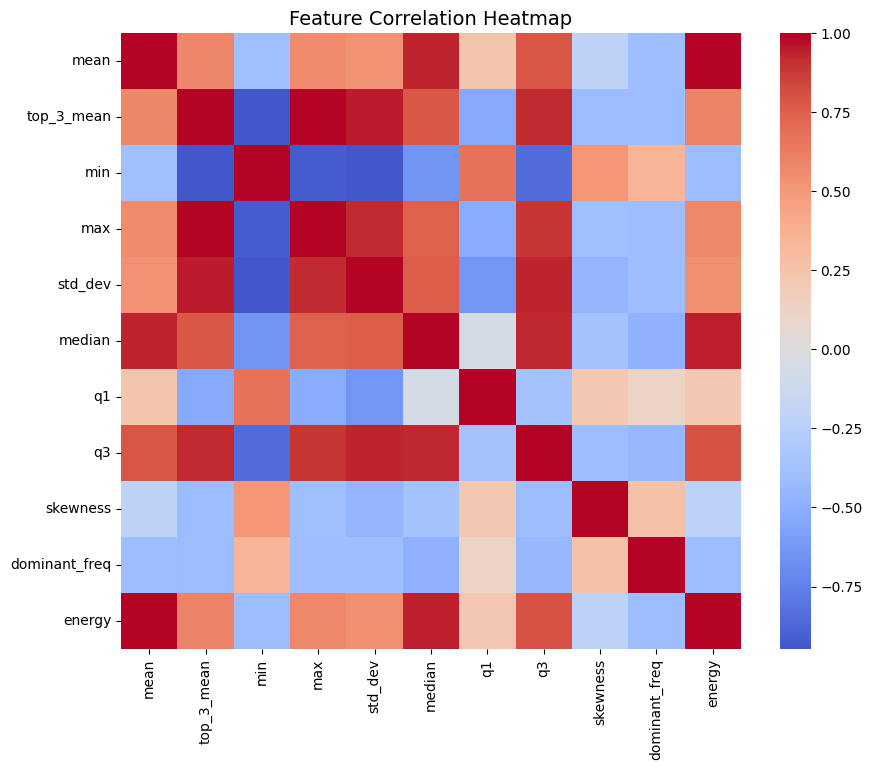

In [6]:
num_features = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
sns.heatmap(num_features.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

# Feature Distributions

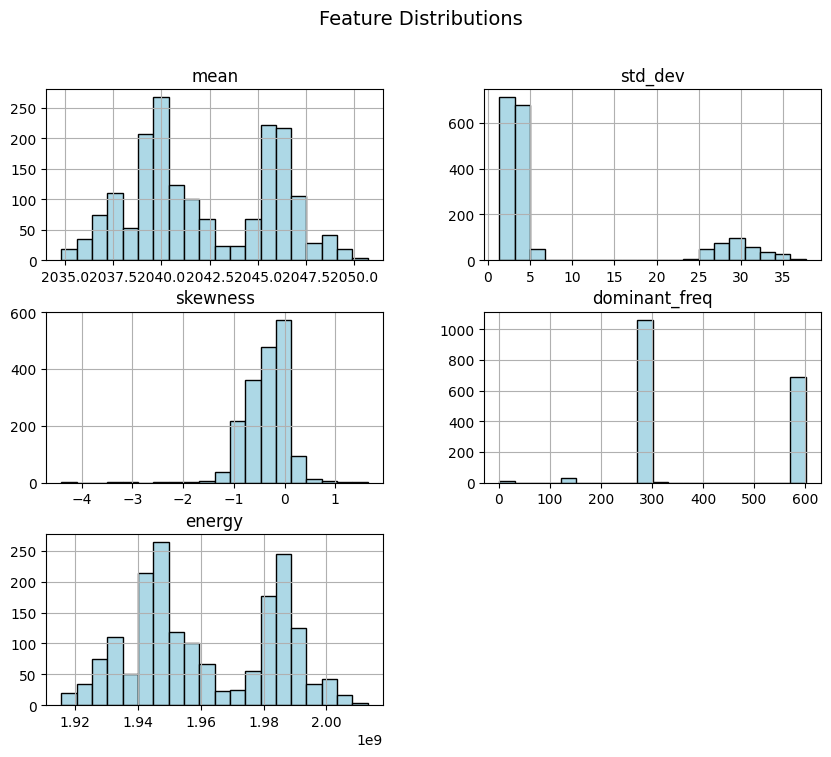

In [7]:
cols_to_plot = ['mean', 'std_dev', 'skewness', 'dominant_freq', 'energy']
df[cols_to_plot].hist(figsize=(10,8), bins=20, color='lightblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=14)
plt.show()

# PCA Visualization

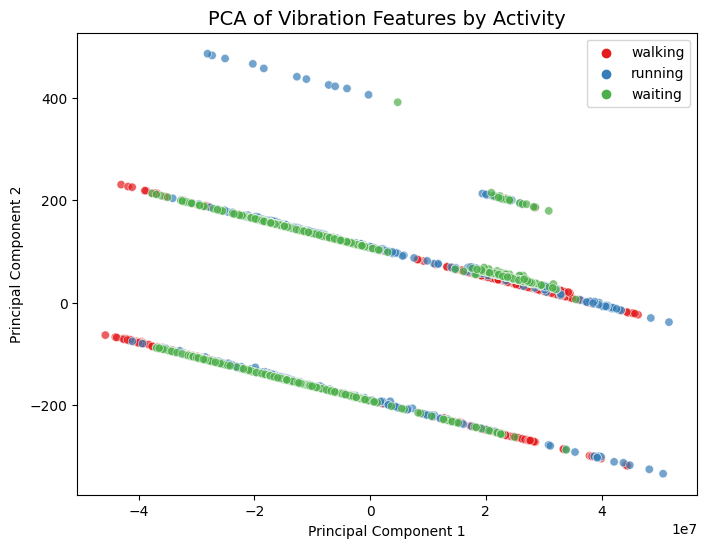

In [8]:
# Encode activity labels
le = LabelEncoder()
df['activity_encoded'] = le.fit_transform(df['activity'])

# Prepare numeric features for PCA
X = num_features.values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],
                hue=df['activity'], palette='Set1', alpha=0.7)
plt.title('PCA of Vibration Features by Activity', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

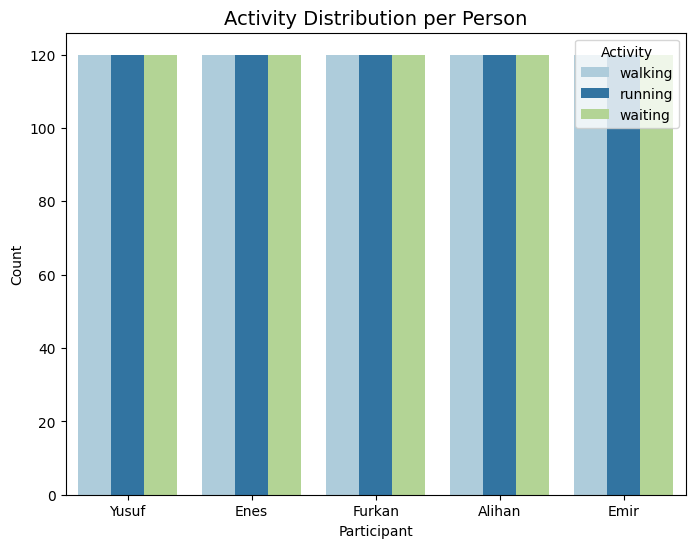

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='name', hue='activity', data=df, palette='Paired')
plt.title('Activity Distribution per Person', fontsize=14)
plt.xlabel('Participant')
plt.ylabel('Count')
plt.legend(title='Activity')
plt.show()

# Model

In [10]:
# Select numeric features (exclude timestamp, activity, name)
feature_cols = ['mean', 'top_3_mean', 'min', 'max', 'std_dev', 'median', 
                'q1', 'q3', 'skewness', 'dominant_freq', 'energy']

X = df[feature_cols]
y = df['activity']

# Encode activity labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1350
Testing samples: 450


In [11]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=2
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8688888888888889

Classification Report:
               precision    recall  f1-score   support

     running       0.86      0.79      0.83       150
     waiting       0.86      0.91      0.89       150
     walking       0.88      0.90      0.89       150

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



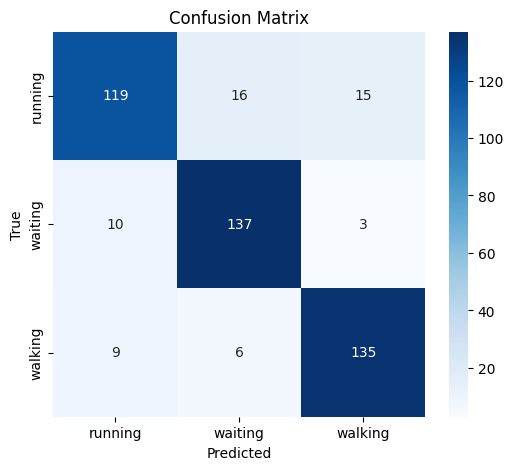

In [12]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

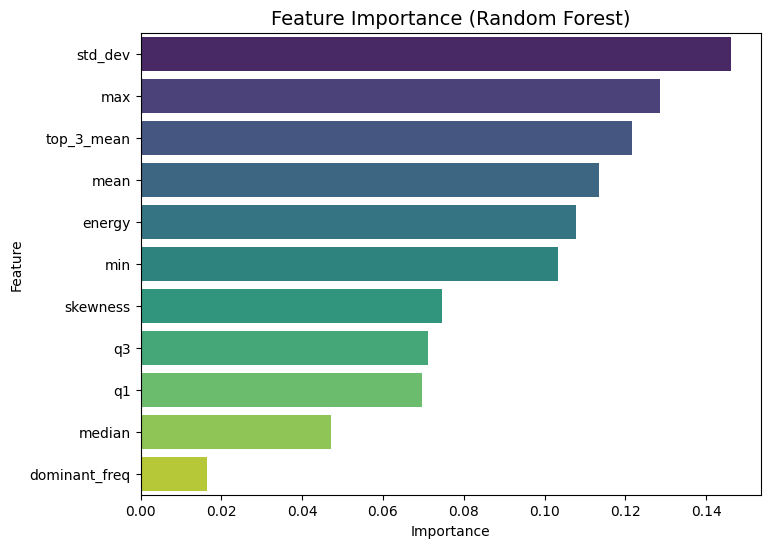

In [13]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=np.array(feature_cols)[indices], palette="viridis")
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [14]:
cv_scores = cross_val_score(rf, X_scaled, y_encoded, cv=5)
print("Cross-Validation Accuracy: %.3f ± %.3f" % (cv_scores.mean(), cv_scores.std()))

Cross-Validation Accuracy: 0.534 ± 0.147


# Conclusion

This study analyzed geophone sensor data to classify human activities—running, walking, and waiting—based on vibration-derived statistical features.

A Random Forest Classifier was trained using 11 engineered features, achieving the following results on the test set:

Accuracy: 0.869

Cross-Validation Accuracy: 0.534 ± 0.147

Macro F1-score: 0.87

While the single test split yielded strong performance, the cross-validation result indicates variability across folds. This suggests that model generalization could be sensitive to participant or signal differences, highlighting the need for further data balancing or feature refinement.

Feature importance analysis showed that the most discriminative features were:

Standard deviation

Maximum value

Mean

Top three mean values

Energy

These features likely capture signal amplitude and variability patterns that differ across motion types. For example, running typically produces higher energy and variability compared to waiting.

Overall, the model effectively distinguishes activities, confirming that geophone vibration data can be used for human activity recognition. However, the moderate cross-validation score suggests that future work should:

Incorporate more data or additional participants,

Explore advanced feature engineering (e.g., frequency-domain or time-series features), and

Perform hyperparameter optimization (e.g., with GridSearchCV) or ensemble methods to enhance stability.